In [1]:
%reset -f

In [2]:
pip install kagglehub -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import kagglehub

C:\Users\thamires.godoy\AppData\Local\anaconda3\envs\primeiro\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import sys

In [5]:
print(sys.executable)

C:\Users\thamires.godoy\AppData\Local\anaconda3\envs\primeiro\python.exe


# 1.Importar os dados

In [126]:
caminho = kagglehub.dataset_download("salvatoremarcello/italian-airbnb-dataset")
print("Caminho do conjunto de dados:", caminho)

Caminho do conjunto de dados: C:\Users\thamires.godoy\.cache\kagglehub\datasets\salvatoremarcello\italian-airbnb-dataset\versions\7


In [127]:
arqvs = os.listdir(caminho)
df = pd.DataFrame(arqvs, columns=['Nome dos Arquivos'])
print(df)

                                  Nome dos Arquivos
0                                        airbnb.csv
1                   airbnb_italian_city_grouped.csv
2          airbnb_italian_neighbourhood_grouped.csv
3              airbnb_italy_city_neighbourhoods.csv
4  airbnb_italy_city_neighbourhoods_geojson.geojson


In [128]:
# Explore os arquivos disponiveis
arqv = input("Qual arquivo abrir?  ")
arqv = caminho+'\\'+arqv
df = pd.read_csv(arqv)
df.head()
#print(df.columns)

Qual arquivo abrir?   airbnb.csv


,Listings id,Last year reviews,Host since,Host is superhost,Host number of listings,Neighbourhood,Beds number,Bedrooms number,Property type,Maximum allowed guests,...,Communication score,Location score,Value for money score,Reviews per month,City,Season,Bathrooms number,Bathrooms type,Coordinates,Date of scraping
0,31840,6,2011-02-07,Host,44.0,Centro Storico,1.0,1.0,Private room,2,...,4.91,4.91,4.70,0.78,Firenze,Early Winter,1,private,"43.77709, 11.25216",2024-12-15
1,222527,0,2011-07-11,Superhost,3.0,Rifredi,3.0,2.0,Entire home,4,...,4.96,4.60,4.86,1.92,Firenze,Early Winter,1,private,"43.82005, 11.22004",2024-12-15
2,32120,6,2010-03-26,Host,1.0,Gavinana Galluzzo,1.0,1.0,Entire home,2,...,4.96,4.63,4.63,0.16,Firenze,Early Winter,1,private,"43.76157, 11.27741",2024-12-15
3,224562,9,2011-09-16,Host,2.0,Centro Storico,1.0,1.0,Entire home,4,...,4.83,4.93,4.64,0.71,Firenze,Early Winter,1,private,"43.772, 11.26142",2024-12-15
4,32180,11,2014-04-05,Superhost,1.0,Centro Storico,4.0,2.0,Entire home,4,...,4.71,4.81,4.84,0.21,Firenze,Early Winter,2,private,"43.76832, 11.24348",2024-12-15


# 2. Limpeza dos dados
A partir daqui apenas o airbnb.csv será trabalhado.

In [93]:
# Transformando o nome dos atributos
df.rename(columns={df.columns[0]: "ID"}, inplace=True)
df.rename(columns={df.columns[1]: "Quantidade_Comentários_Último_Ano"}, inplace=True)
df.rename(columns={df.columns[2]: "Data_Inicio_Host"}, inplace=True)
df.rename(columns={df.columns[3]: "SuperHost_ou_Host"}, inplace=True)
df.rename(columns={df.columns[4]: "Quantidade_Propriedades_do_Host"}, inplace=True)
df.rename(columns={df.columns[5]: "Bairros"}, inplace=True)
df.rename(columns={df.columns[6]: "Quantidade_Camas"}, inplace=True)
df.rename(columns={df.columns[7]: "Quantidade_Quartos"}, inplace=True)
df.rename(columns={df.columns[8]: "Tipo_Propriedade"}, inplace=True)
df.rename(columns={df.columns[9]: "Máximo_Hóspedes"}, inplace=True)
df.rename(columns={df.columns[10]: "Preço"}, inplace=True)
df.rename(columns={df.columns[11]: "Total_Comentários"}, inplace=True)
df.rename(columns={df.columns[12]: "Avaliação"}, inplace=True)
df.rename(columns={df.columns[13]: "Pontuação_Acurácia_Anúncio"}, inplace=True)
df.rename(columns={df.columns[14]: "Pontuação_Limpeza"}, inplace=True)
df.rename(columns={df.columns[15]: "Pontuação_CheckIn"}, inplace=True)
df.rename(columns={df.columns[16]: "Pontuação_Comunicação"}, inplace=True)
df.rename(columns={df.columns[17]: "Pontuação_Localização"}, inplace=True)
df.rename(columns={df.columns[18]: "Pontuação_Custo_Benefício"}, inplace=True)
df.rename(columns={df.columns[19]: "Avaliações_Mês"}, inplace=True)
df.rename(columns={df.columns[20]: "Cidade"}, inplace=True)
df.rename(columns={df.columns[21]: "Estação"}, inplace=True)
df.rename(columns={df.columns[22]: "Quantidade_Banheiros"}, inplace=True)
df.rename(columns={df.columns[23]: "Tipo_Banheiro"}, inplace=True)
df.rename(columns={df.columns[24]: "Coordenadas"}, inplace=True)
df.rename(columns={df.columns[25]: "Data_Raspagem"}, inplace=True)

In [94]:
# Verificando os tipos de dados e valores nulos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282047 entries, 0 to 282046
Data columns (total 26 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 282047 non-null  int64  
 1   Quantidade_Comentários_Último_Ano  282047 non-null  int64  
 2   Data_Inicio_Host                   282047 non-null  object 
 3   SuperHost_ou_Host                  282047 non-null  object 
 4   Quantidade_Propriedades_do_Host    282047 non-null  float64
 5   Bairros                            282047 non-null  object 
 6   Quantidade_Camas                   282047 non-null  float64
 7   Quantidade_Quartos                 282047 non-null  float64
 8   Tipo_Propriedade                   282047 non-null  object 
 9   Máximo_Hóspedes                    282047 non-null  int64  
 10  Preço                              282047 non-null  float64
 11  Total_Comentários                  2820

In [96]:
# 2. ID deve ser strin(object)
df.iloc[:,0]=df.iloc[:,0].astype(str)
print((df.iloc[:,0]).dtype)

# A primeira execução resulta no aviso: 'FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas'
# Isso acontece pois o Pandas tenta preservar o tipo int64 da coluna original.
# Na segunda execução, ele já considera os dados como object e permite a conversão sem avisos.

object


In [97]:
# 3. Data_Inicio_Host tem que ser do tipo data e no formato d/m/y
df['Data_Inicio_Host']=pd.to_datetime(df['Data_Inicio_Host']).dt.strftime('%d/%m/%Y')

In [98]:
#4. Verificar se há cidades escritas de forma errada e transformar o nome para português
print(df['Cidade'].unique())

pt_cidades = {
    'Firenze': 'Florença',
    'Milano': 'Milão',
    'Napoli': 'Nápoles',
    'Roma': 'Roma',
    'Venezia': 'Veneza'
}

df['Cidade'] = df['Cidade'].replace(pt_cidades)

print(df['Cidade'].unique())

['Firenze' 'Milano' 'Napoli' 'Roma' 'Venezia']
['Florença' 'Milão' 'Nápoles' 'Roma' 'Veneza']


In [99]:
#5. Colocar o nome dos bairros com apenas a primeira maiuscula
df['Bairros'] = df['Bairros'].str.title()
print(df['Bairros'].unique())

['Centro Storico' 'Rifredi' 'Gavinana Galluzzo' 'Campo Di Marte'
 'Isolotto Legnaia' 'Xxii Marzo' 'Tibaldi' 'Navigli' 'Ticinese'
 "Citta' Studi" 'Viale Monza' 'Buenos Aires - Venezia' 'Centrale'
 'Magenta - S. Vittore' 'Duomo' 'Parco Lambro - Cimiano'
 'Ronchetto Sul Naviglio' 'Brera' 'Washington' 'Tortona'
 'Parco Forlanini - Ortica' 'Villapizzone' 'Guastalla' 'Stadera'
 'S. Cristoforo' 'Sarpi' 'Bovisa' 'Giambellino' 'Loreto' 'Vigentina'
 'Isola' 'Padova' 'Umbria - Molise' 'De Angeli - Monte Rosa' 'Bovisasca'
 'Porta Romana' 'Garibaldi Repubblica' 'Lodi - Corvetto'
 "Niguarda - Ca' Granda" 'Gratosoglio - Ticinello' 'Bicocca'
 'Forze Armate' 'Giardini Porta Venezia' 'Ripamonti' 'Bande Nere'
 'Gallaratese' 'Pagano' 'Farini' 'Barona' 'Lambrate' 'Ghisolfa'
 'Lorenteggio' 'Adriano' 'Ex Om - Morivione' 'Quinto Romano' 'Corsica'
 'Affori' 'Greco' 'Selinunte' 'Dergano' 'Maciachini - Maggiolina'
 'Ortomercato' 'S. Siro' 'Rogoredo' 'Mecenate' 'Quarto Oggiaro'
 'Scalo Romana' 'Triulzo Superiore'

In [100]:
# 6. Traduzir para português: tipo de propriedade, estação do ano e tipo de banheiro
# tipo de propriedade
print(df['Tipo_Propriedade'].unique())

pt_tipo_propriedade = {
    'Private room': 'Quarto Privado',
    'Entire home': 'Casa Completa',
    'Hotel room': 'Quarto de Hotel',
    'Shared room': 'Quarto Compartilhado'
}

df['Tipo_Propriedade'] = df['Tipo_Propriedade'].replace(pt_tipo_propriedade)

print(df['Tipo_Propriedade'].unique())

# estação do ano
print(df['Estação'].unique())

pt_estacao = {
   'Early Winter': 'Inverno',
   'Early Spring': 'Primavera',
   'Early Summer': 'Verão',
   'Early Autumn': 'Outono'
}

df['Estação'] = df['Estação'].replace(pt_estacao)

print(df['Estação'].unique())

# tipo de banheiro
print(df['Tipo_Banheiro'].unique())

pt_banheiro = {
   'private': 'Privado',
   'shared': 'Compartilhado',
}

df['Tipo_Banheiro'] = df['Tipo_Banheiro'].replace(pt_banheiro)

print(df['Tipo_Banheiro'].unique())

['Private room' 'Entire home' 'Hotel room' 'Shared room']
['Quarto Privado' 'Casa Completa' 'Quarto de Hotel' 'Quarto Compartilhado']
['Early Winter' 'Early Spring' 'Early Summer' 'Early Autumn']
['Inverno' 'Primavera' 'Verão' 'Outono']
['private' 'shared']
['Privado' 'Compartilhado']


In [101]:
# 7. Quantidade de camas e quartos deve ser int
df['Quantidade_Camas'] = df['Quantidade_Camas'].astype(int)
df['Quantidade_Quartos'] = df['Quantidade_Quartos'].astype(int)

print(df['Quantidade_Camas'].dtype)
print(df['Quantidade_Quartos'].dtype)

int32
int32


In [102]:
# 8. Excluir data da raspagem
df = df.drop('Data_Raspagem', axis=1)
df = df.drop('Quantidade_Propriedades_do_Host', axis=1)

In [103]:
#Verificando estatisticas para os dados numéricos
print(df.describe())

       Quantidade_Comentários_Último_Ano  Quantidade_Camas  \
count                      282047.000000     282047.000000   
mean                           17.187639          2.050325   
std                            22.029768          1.300188   
min                             0.000000          0.000000   
25%                             2.000000          1.000000   
50%                             8.000000          2.000000   
75%                            26.000000          3.000000   
max                           926.000000         10.000000   

       Quantidade_Quartos  Máximo_Hóspedes          Preço  Total_Comentários  \
count       282047.000000    282047.000000  282047.000000      282047.000000   
mean             1.381422         3.604658     173.157004          61.116112   
std              0.730077         1.804754     736.260971          97.325177   
min              0.000000         1.000000       8.000000           1.000000   
25%              1.000000         2.00000

In [104]:
# Exclusão de registros que possuem 0 camas, banheiros ou quartos
df = df.drop(df[(df['Quantidade_Camas'] == 0) | (df['Quantidade_Quartos'] == 0)|(df['Quantidade_Banheiros'] == 0)].index)

In [105]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 263776 entries, 0 to 282046
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 263776 non-null  object 
 1   Quantidade_Comentários_Último_Ano  263776 non-null  int64  
 2   Data_Inicio_Host                   263776 non-null  object 
 3   SuperHost_ou_Host                  263776 non-null  object 
 4   Bairros                            263776 non-null  object 
 5   Quantidade_Camas                   263776 non-null  int32  
 6   Quantidade_Quartos                 263776 non-null  int32  
 7   Tipo_Propriedade                   263776 non-null  object 
 8   Máximo_Hóspedes                    263776 non-null  int64  
 9   Preço                              263776 non-null  float64
 10  Total_Comentários                  263776 non-null  int64  
 11  Avaliação                          263776 no

# 3. Análise dos Dados
Nessa etapas queremos responder algumas perguntas.

In [106]:
###### 1. Qual a pontuação média de cada um dos itens avaliativos de um superhost? Isso varia quantos pontos?

def media_SuperHost():
    print("Essa função mostra a média das pontuações dos SuperHost")
    x = input("Selecione um numero:\n 1-Acurácia do Anúncio\n 2-Limpeza\n 3-Check-in\n 4-Comunicação\n 5-Localização\n 6-Custo Benefício\n")
    df_sh = df[df["SuperHost_ou_Host"] == "Superhost"]


    match x:
        case "1":
            y = round(df_sh["Pontuação_Acurácia_Anúncio"].mean(),3)
            z = df_sh["Pontuação_Acurácia_Anúncio"].max() - df_sh["Pontuação_Acurácia_Anúncio"].min()
        case "2":
            y = round(df_sh["Pontuação_Limpeza"].mean(),3)
            z = df_sh["Pontuação_Limpeza"].max() - df_sh["Pontuação_Limpeza"].min()
        case "3":
            y = round(df_sh["Pontuação_CheckIn"].mean(),3)
            z = df_sh["Pontuação_CheckIn"].max() - df_sh["Pontuação_CheckIn"].min()
        case "4":
            y = round(df_sh["Pontuação_Comunicação"].mean(),3)
            z = df_sh["Pontuação_Comunicação"].max() - df_sh["Pontuação_Comunicação"].min()
        case "5":
            y = round(df_sh["Pontuação_Localização"].mean(),3)
            z = df_sh["Pontuação_Localização"].max() - df_sh["Pontuação_Localização"].min()
        case "6":
            y = round(df_sh["Pontuação_Custo_Benefício"].mean(),3)
            z = df_sh["Pontuação_Custo_Benefício"].max() - df_sh["Pontuação_Custo_Benefício"].min()
    return y, z

In [107]:
media_SuperHost()

Essa função mostra a média das pontuações dos SuperHost


Selecione um numero:
 1-Acurácia do Anúncio
 2-Limpeza
 3-Check-in
 4-Comunicação
 5-Localização
 6-Custo Benefício
 4


(4.926, 4.0)

Observa-se que a média está próxima do valor máximo (5), mas todas as pontuações apresentam uma variação de 4 pontos. Isso sugere que o histograma desses dados pode apresentar uma assimetria negativa. Vamos conferir!

Essa função mostra a distribuição das pontuações dos SuperHost


Selecione um numero:
 1-Acurácia do Anúncio
 2-Limpeza
 3-Check-in
 4-Comunicação
 5-Localização
 6-Custo Benefício
 4


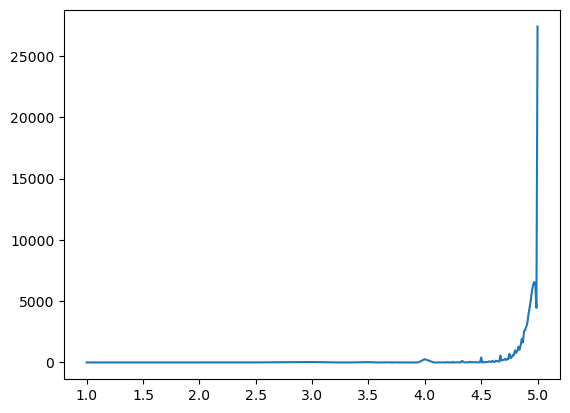

In [108]:
def dist_SuperHost():
    print("Essa função mostra a distribuição das pontuações dos SuperHost")
    x = input("Selecione um numero:\n 1-Acurácia do Anúncio\n 2-Limpeza\n 3-Check-in\n 4-Comunicação\n 5-Localização\n 6-Custo Benefício\n")
    df_sh = df[df["SuperHost_ou_Host"] == "Superhost"]


    match x:
        case "1":
            freq = df_sh["Pontuação_Acurácia_Anúncio"].value_counts().sort_index()
            plt.plot(freq.index, freq.values, linestyle='-')
        case "2":
            freq = df_sh["Pontuação_Limpeza"].value_counts().sort_index()
            plt.plot(freq.index, freq.values, linestyle='-')
        case "3":
            freq = df_sh["Pontuação_CheckIn"].value_counts().sort_index()
            plt.plot(freq.index, freq.values, linestyle='-')
        case "4":
            freq = df_sh["Pontuação_Comunicação"].value_counts().sort_index()
            plt.plot(freq.index, freq.values, linestyle='-')
        case "5":
            freq = df_sh["Pontuação_Localização"].value_counts().sort_index()
            plt.plot(freq.index, freq.values, linestyle='-')
        case "6":
            freq = df_sh["Pontuação_Custo_Benefício"].value_counts().sort_index()
            plt.plot(freq.index, freq.values, linestyle='-')
    return

dist_SuperHost()

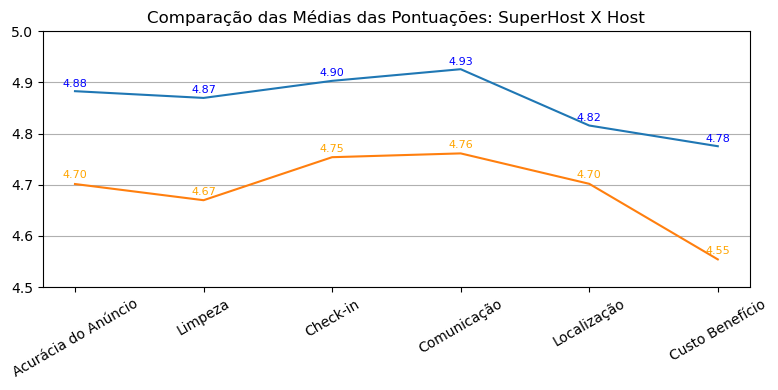

In [110]:
# 2. Comparar as pontuações de um SuperHost com um Host.

df_sh = df[df["SuperHost_ou_Host"] == "Superhost"]
df_h = df[df["SuperHost_ou_Host"] == "Host"]

medias_df_sh = [df_sh["Pontuação_Acurácia_Anúncio"].mean(),
                   df_sh["Pontuação_Limpeza"].mean(),
                   df_sh["Pontuação_CheckIn"].mean(),
                   df_sh["Pontuação_Comunicação"].mean(),
                   df_sh["Pontuação_Localização"].mean(),
                   df_sh["Pontuação_Custo_Benefício"].mean()] 
medias_df_h = [df_h["Pontuação_Acurácia_Anúncio"].mean(),
                  df_h["Pontuação_Limpeza"].mean(),
                  df_h["Pontuação_CheckIn"].mean(),
                  df_h["Pontuação_Comunicação"].mean(),
                  df_h["Pontuação_Localização"].mean(),
                  df_h["Pontuação_Custo_Benefício"].mean()]

rotulos = ["Acurácia do Anúncio", "Limpeza", "Check-in",
          "Comunicação", "Localização", "Custo Benefício"]


plt.figure(figsize=(8,4))
plt.plot(rotulos,medias_df_sh)
plt.plot(rotulos,medias_df_h)
plt.title("Comparação das Médias das Pontuações: SuperHost X Host")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y')
plt.ylim(4.5, 5.0)

for i, label in enumerate(rotulos):
    plt.text(i, medias_df_sh[i]+0.005, f"{medias_df_sh[i]:.2f}", 
             ha='center', va='bottom', fontsize=8, color='blue')
    plt.text(i, medias_df_h[i]+0.007, f"{medias_df_h[i]:.2f}", 
             ha='center', va='bottom', fontsize=8, color='orange')

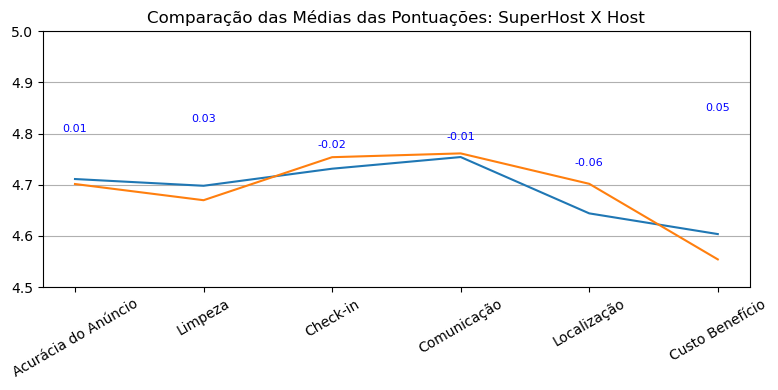

In [112]:
df_sh = df[df["SuperHost_ou_Host"] == "Superhost"]
df_h = df[df["SuperHost_ou_Host"] == "Host"]

medias_df_sh = [df_sh["Pontuação_Acurácia_Anúncio"].mean(),
                   df_sh["Pontuação_Limpeza"].mean(),
                   df_sh["Pontuação_CheckIn"].mean(),
                   df_sh["Pontuação_Comunicação"].mean(),
                   df_sh["Pontuação_Localização"].mean(),
                   df_sh["Pontuação_Custo_Benefício"].mean()] 
medias_df_h = [df_h["Pontuação_Acurácia_Anúncio"].mean(),
                  df_h["Pontuação_Limpeza"].mean(),
                  df_h["Pontuação_CheckIn"].mean(),
                  df_h["Pontuação_Comunicação"].mean(),
                  df_h["Pontuação_Localização"].mean(),
                  df_h["Pontuação_Custo_Benefício"].mean()]

medias_df_sh = pd.Series(medias_df_sh)
medias_df_h = pd.Series(medias_df_h)

sub_medias = medias_df_sh-medias_df_h
tx = sub_medias.mean()

medias_df_sh_tx = medias_df_sh - tx
dif = medias_df_sh_tx-medias_df_h

rotulos = ["Acurácia do Anúncio", "Limpeza", "Check-in",
          "Comunicação", "Localização", "Custo Benefício"]


plt.figure(figsize=(8,4))
plt.plot(rotulos,medias_df_sh_tx)
plt.plot(rotulos,medias_df_h)
plt.title("Comparação das Médias das Pontuações: SuperHost X Host")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y')
plt.ylim(4.5, 5.0)

for i, label in enumerate(rotulos):
    plt.text(i, dif[i]+4.79, f"{dif[i]:.2f}", ha='center', va='bottom', fontsize=8, color='blue')

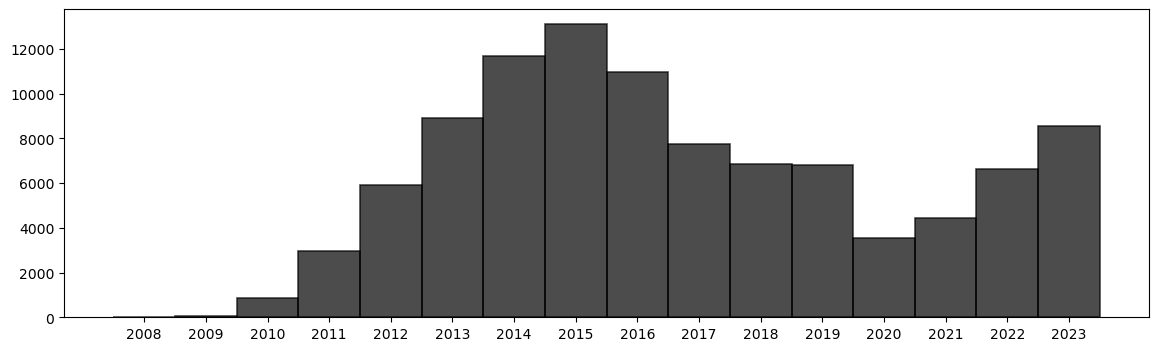

In [113]:
# 3. Qual o ano que mais recebeu anfitriões que se tornaram SuperHost?

df_sh = df[df["SuperHost_ou_Host"] == "Superhost"].copy() # para que a nova coluna não modifique o df original
df_sh["Data_Inicio_Host"] = pd.to_datetime(df_sh["Data_Inicio_Host"], dayfirst=True)

df_sh["Ano_Inicio_Host"] = df_sh["Data_Inicio_Host"].dt.year #nova coluna

plt.figure(figsize=(14,4))
plt.tight_layout()
plt.hist(df_sh["Ano_Inicio_Host"], bins=range(2008, 2025), color='black', alpha=0.7, edgecolor='black', linewidth=1.2, align='left')
plt.xticks(ticks=range(2008, 2024, 1));

In [71]:
# 4. Se uma pessoa tem mais de um imóvel, ela tem mais chance de ser superhost?

# df_sh = df[df["SuperHost_ou_Host"] == "Superhost"]
# df_h = df[df["SuperHost_ou_Host"] == "Host"]
print(df['Quantidade_Propriedades_do_Host'].unique())


[4.400e+01 3.000e+00 1.000e+00 2.000e+00 6.000e+00 1.200e+01 5.000e+00
 1.600e+02 4.000e+00 2.800e+01 9.000e+00 8.000e+00 7.000e+00 1.500e+01
 1.400e+01 1.100e+01 4.800e+01 1.300e+01 1.600e+01 2.500e+01 1.000e+01
 3.300e+01 3.400e+01 1.900e+01 1.270e+02 5.900e+01 1.800e+01 2.100e+01
 3.700e+01 1.700e+01 4.300e+01 2.040e+02 1.460e+02 5.800e+01 5.200e+01
 3.720e+02 3.500e+01 2.900e+01 2.700e+01 2.600e+01 1.260e+02 2.000e+01
 4.000e+01 2.200e+01 7.800e+01 5.300e+01 1.610e+02 4.600e+01 6.400e+01
 2.370e+02 4.900e+01 5.100e+01 6.100e+01 2.100e+02 4.050e+02 3.900e+01
 2.400e+01 6.600e+01 3.200e+01 2.830e+02 7.040e+02 5.500e+01 3.960e+02
 1.420e+02 2.750e+02 1.180e+02 1.110e+02 1.230e+02 5.000e+01 5.600e+01
 2.680e+02 4.200e+01 1.120e+02 9.100e+01 9.700e+01 9.800e+01 6.800e+01
 2.840e+02 2.130e+02 3.380e+02 1.390e+02 4.180e+02 8.900e+01 9.110e+02
 1.272e+03 3.800e+01 6.660e+02 2.315e+03 4.100e+01 9.570e+02 5.521e+03
 2.120e+02 9.900e+02 9.770e+02 3.180e+02 1.002e+03 2.430e+02 1.226e+03
 7.020